In [6]:
import pandas as pd
import matplotlib.pyplot as plt

course_file = 'srcdata/2024-07-11/csv/C000018.csv'
data = pd.read_csv(course_file)
data.fillna(0, inplace=True)
data.head()

,P001TAC,P001TCE,P001TLS,P001TNA,P001TSC,P001TSS,P001TST,P001TWA,P002TAC,P002TCE,...,PAS061,PAS062,PAS063,PAS065,PAS066,TPS,edate,ename,sid,sname
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,20230925,小考-1,wbafgIHx2Chhlkf5K02WMAyNRLf1,賴彥璋
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,20230925,小考-1,W6bytQYJMThcDJeVcIJNaJuMwa12,臧韋翔
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,20230925,小考-1,PvaX2Q3jgVfuDD0JmNpp0tm01Xe2,林婕蓁
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,20230925,小考-1,JuI7Uxg8hbOra1sVhwcJuONZkWO2,陳韋誌
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,20230925,小考-1,4kJZ8xRtbRV4tFujynh5mEmpNvj1,梁珮怡


In [10]:
quizdata = data[data['ename'].str.startswith('小考')]
quizdata.shape

(166, 402)

In [20]:
import re

digit_columns = [col for col in data.columns if re.match('^P\d+', col) and not col.startswith('PAS')]
xdata = quizdata[digit_columns]
xdata.shape

(166, 352)

In [28]:
pas_columns = [col for col in data.columns if col.startswith('PAS')]
ydata = quizdata[pas_columns]
ydata = ydata.loc[:, (ydata != 0).any(axis=0)]
ydata.columns
y2data = ydata.replace(-1, 0)
zdata = y2data.sum(axis=1)
zdata.shape

(166,)

In [25]:
xdata.columns

Index(['P001TAC', 'P001TCE', 'P001TLS', 'P001TNA', 'P001TSC', 'P001TSS',
       'P001TST', 'P001TWA', 'P002TAC', 'P002TCE',
       ...
       'P065TST', 'P065TWA', 'P066TAC', 'P066TCE', 'P066TLS', 'P066TNA',
       'P066TSC', 'P066TSS', 'P066TST', 'P066TWA'],
      dtype='object', length=352)

In [29]:
middata = data[data['ename'].str.startswith('期中')]
middata.shape

(57, 402)

In [58]:
import numpy as np

tac_columns = [col for col in data.columns if 'TAC' in col]
TACsum = middata[tac_columns].sum(axis=1)
pas_columns = [col for col in data.columns if col.startswith('PAS')]
mscore = middata[pas_columns].replace(-1, 0).sum(axis=1)
# mscore = mscore + 0.1*np.random.rand(mscore.shape[0])
TACsum.shape, mscore.shape

((57,), (57,))

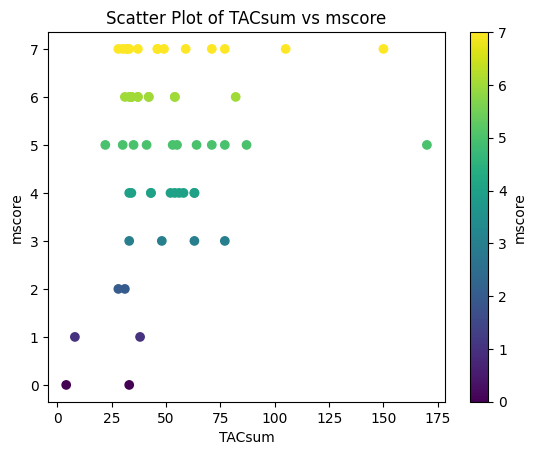

In [59]:
import matplotlib.pyplot as plt

plt.scatter(TACsum, mscore, c=mscore, cmap='viridis')
plt.xlabel('TACsum')
plt.ylabel('mscore')
plt.title('Scatter Plot of TACsum vs mscore')
plt.colorbar(label='mscore')
plt.show()
# plt.xlabel('TACsum')
# plt.ylabel('mscore')
# plt.title('Scatter Plot of TACsum vs mscore')
# plt.show()

In [52]:
correlation = TACsum.corr(mscore)
print("Correlation between TACsum and mscore:", correlation)

Correlation between TACsum and mscore: 0.24290547564172071
